## Bike Sharing System
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### Steps that we will be executing in order to make a prediction model 
1. import the libarraies and import the data
2. Reading and understanding the data and draw some meaningful insights from the data
3. splitting the data into dependent and independent variables.
4. splitting into the training and testing data.
5. Training the data
6. residual analysis and model evaluation and prediction.

## Step 1: understanding the data:

In [1]:
## importing  all the necesaary  libarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
## import the data 
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Let us see what the features in the data represent and their characterstics

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
df.shape

(730, 16)

this means we 16 columns and 730 rows.

In [4]:
## let us see the statistical summary of the data.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

##### Let us know encode the features which are into binary formats according to the information given above

In [7]:
## we are mapping the binary formats of the season into the actual names so as to convert them into the numerical variable.
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [8]:
## similarly doing it for the year  and the month
df['yr']=df['yr'].map({1:'2019',0:'2018'})
df['mnth']=df['mnth'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [9]:
## performing the same and converting them into the categorical variable.
df['weekday']=df['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

df['weathersit']=df['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

In [10]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Sun,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Mon,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Thurs,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
## now we are going to drop the unwanted variables/features which are not necesaary in interprating the model.
columns_to_drop=['instant','dteday','atemp','casual','registered']
df=df.drop(columns=columns_to_drop,axis=1)

In [12]:
## checking the df again.
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sun,0,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Mon,0,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Tues,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Thurs,1,Clear,9.305237,43.6957,12.522300,1600


In [13]:
## checking the features information now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 62.9+ KB


In [14]:
## dividing the features into numerical and the categorical features
numerical_features=[features for features in df.columns if df[features].dtype!='object' ]
categorical_features=[features for features in df.columns if df[features].dtype=='object']
print("the categorical features of the datasets are:  ",categorical_features)
print("the numerical features of the datasets are:  ",numerical_features)

the categorical features of the datasets are:   ['season', 'yr', 'mnth', 'weekday', 'weathersit']
the numerical features of the datasets are:   ['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']


In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sun,0,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Mon,0,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Tues,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Thurs,1,Clear,9.305237,43.6957,12.522300,1600


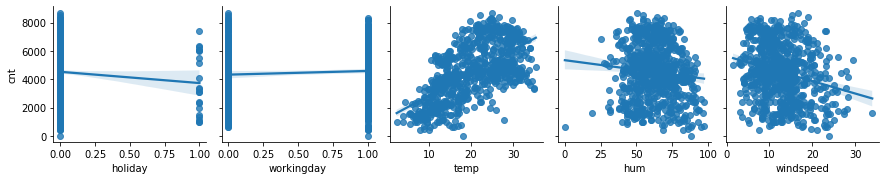

In [16]:
## Let us see the  visualization of the numerical variables with respect to the target features
sns.pairplot(data=df, x_vars=['holiday', 'workingday', 'temp', 'hum', 'windspeed'],
    y_vars='cnt',kind='reg')
plt.show()

we can see from the pairplot that the temp is positively corelated to each other.  and the humidity is not impacting the count of the bike renting sales. and windspeed is also not showing a direct corelation with the target variable as per the pair plot. 

####  Let us now visualize the categorical variables impacting the target features which is the count feature.


In [17]:
categorical_features

['season', 'yr', 'mnth', 'weekday', 'weathersit']

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

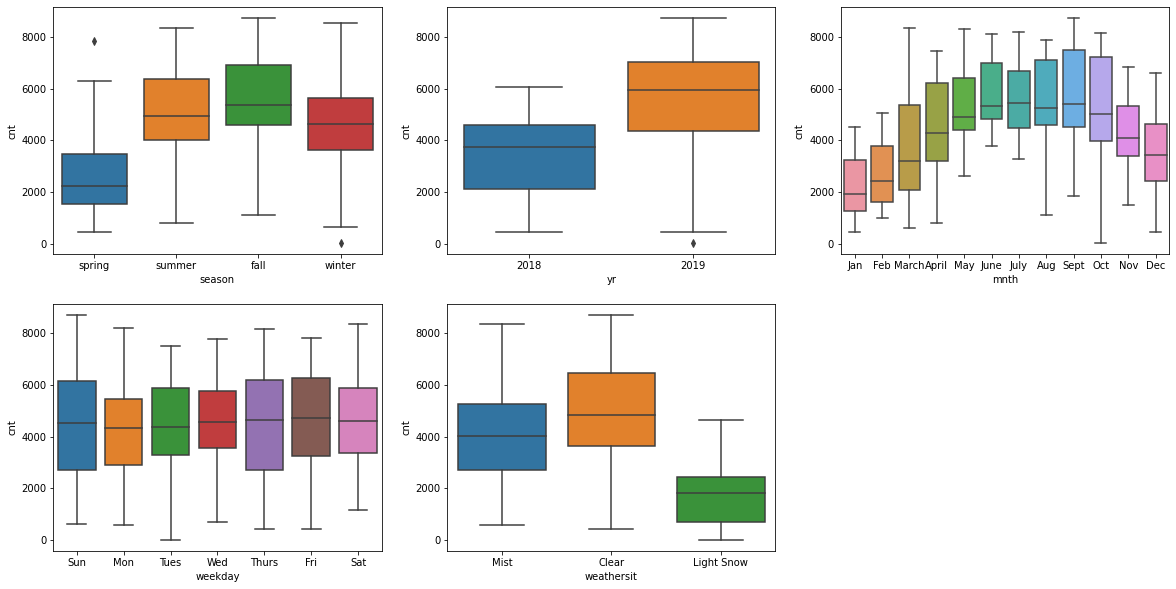

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='weathersit',y='cnt',data=df)


through the analysis we can say different things for the different categorical variables.
1. season - for the season the median of the fall is better and can be the reason for the high count of bike rentals.
2. year- for the year 2019 is the year where the maximum bikes have been rented out when it is compared to the 2018
3. month- for the month of july the median is on the top hence july saw the maximum rentals for the bike.
4. weekday-  sunday shows the highest bike rentals out of all the  weekdays.
5. weathersit-  on  clear whether  people tend to rent bike more instead of mist and light snow.

### Creating the dummy variables for the categorical variables for the different categories.


In [19]:
season_df=pd.get_dummies(df['season'])
season_df.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [20]:
## since we can take the only first 3 variables hence we can drop the  last columns
season_df=pd.get_dummies(df['season'],drop_first=True)
season_df.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
## similary doing it for the other categorical variables as well
yr_df=pd.get_dummies(df['yr'],drop_first=True)
mnth_df=pd.get_dummies(df['mnth'],drop_first=True)
weekday_df=pd.get_dummies(df['weekday'],drop_first=True)
weathersit_df=pd.get_dummies(df['weathersit'],drop_first=True)

In [22]:
## Now concatinating all the dummy dataframes with the original one
df=pd.concat([df,season_df,yr_df,mnth_df,weekday_df,weathersit_df],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow,Mist
0,spring,2018,Jan,0,Sun,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,1
1,spring,2018,Jan,0,Mon,0,Mist,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,1
2,spring,2018,Jan,0,Tues,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,0,Thurs,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,1,0,0,0,0


In [23]:
## dropping the categorical variables now
df=df.drop(columns=categorical_features,axis=1)
df.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow,Mist
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


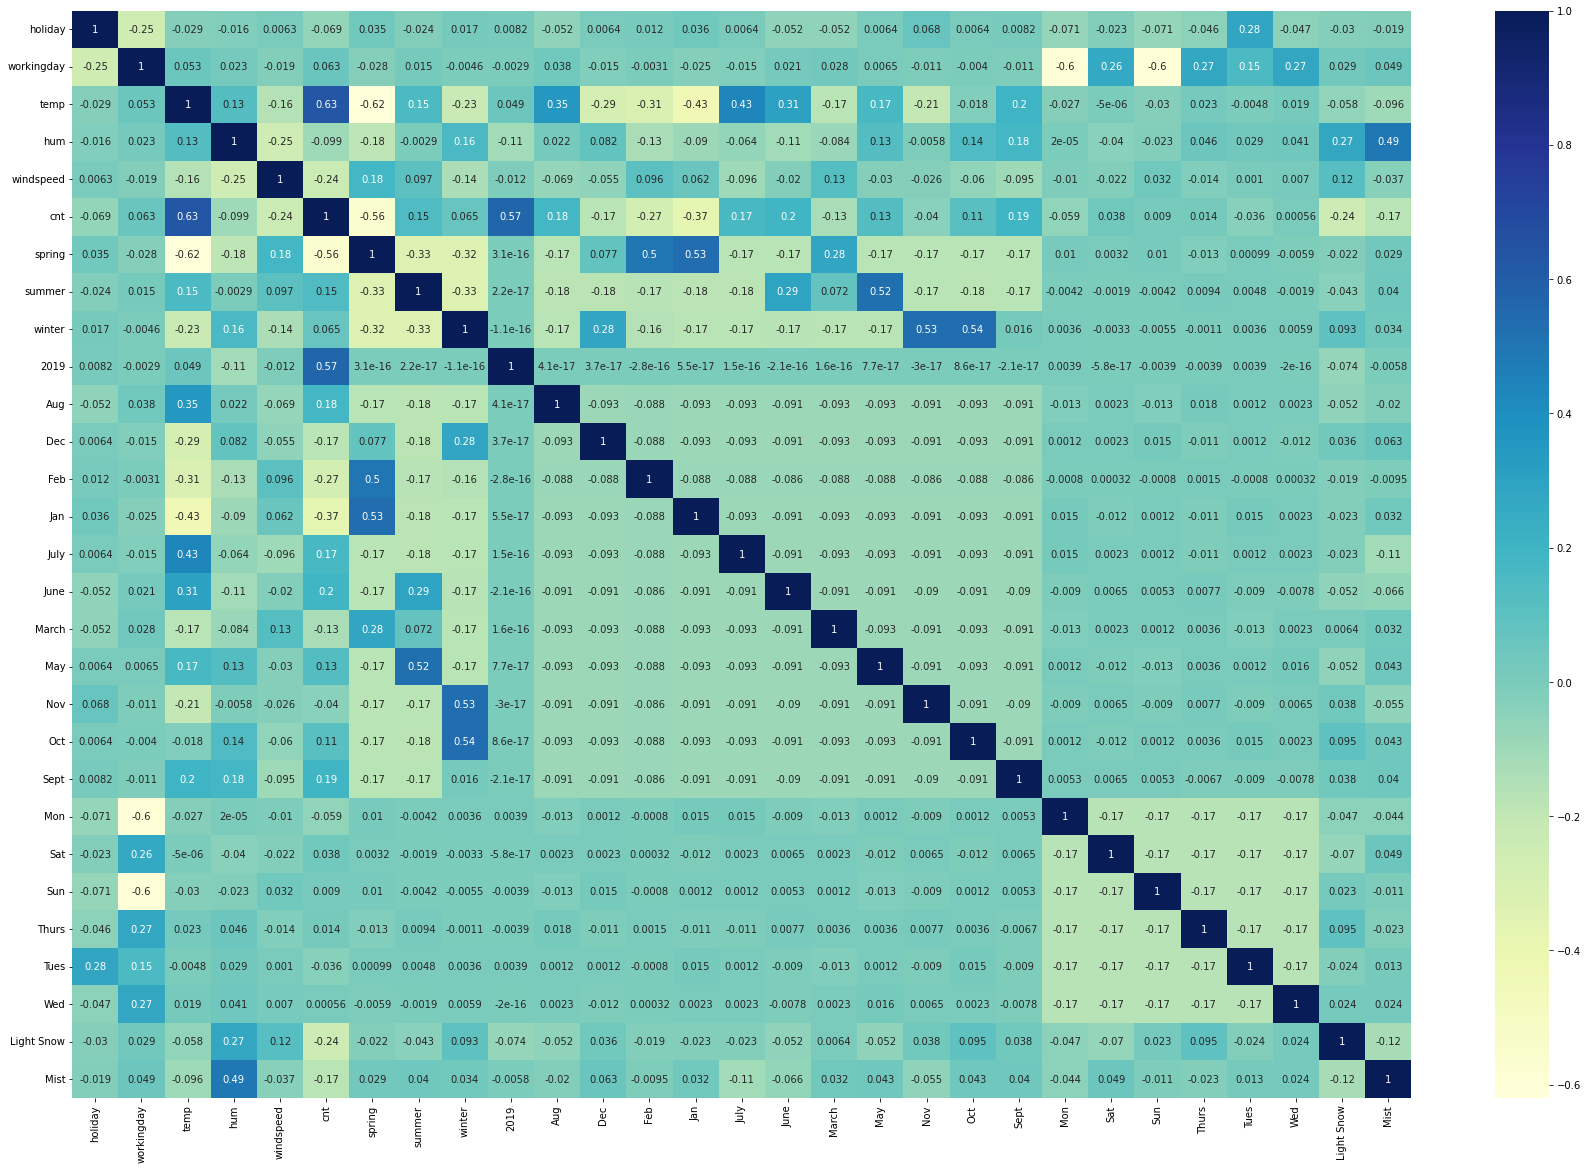

In [24]:
## Plotting the corelation matrix of the final data
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Splitting the data--Training

In [25]:
df_train,df_test=train_test_split(df, train_size=0.7,random_state=100)
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow,Mist
576,0,1,29.246653,70.4167,11.083475,7216,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
426,0,0,16.980847,62.1250,10.792293,4066,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
728,0,0,10.489153,48.3333,23.500518,1796,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
482,0,0,15.443347,48.9583,8.708325,4220,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,1,13.803347,72.9583,14.707907,1683,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', '2019', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June',
       'March', 'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thurs',
       'Tues', 'Wed', 'Light Snow', 'Mist'],
      dtype='object')

In [27]:
df_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow,Mist
184,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,0,1,32.082500,59.2083,7.625404,6211,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,1,19.270000,81.2917,13.250121,2659,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
221,0,1,31.433347,42.4167,13.417286,4780,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,1,29.315000,30.5000,19.583229,4968,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Rescaling the Features:
Here we are using the min max scaling for all the numerical variables so as to scale them so that they can be interpreted in a good way
there are 2 ways of rescaling the features:
1. standeredization
2. normalization(Min -Max scaling)

In [28]:
## initializing the object of the min max scaler
scaler=MinMaxScaler()
var_num=['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', '2019', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June',
       'March', 'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thurs',
       'Tues', 'Wed', 'Light Snow', 'Mist']
## scaling the training data and using the fit_transform on it
df_train[var_num]=scaler.fit_transform(df_train[var_num])
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow,Mist
576,0.0,1.0,0.815169,0.725633,0.264686,0.827658,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
426,0.0,0.0,0.442393,0.640189,0.255342,0.465255,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
728,0.0,0.0,0.245101,0.498067,0.663106,0.204096,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.0,0.0,0.395666,0.504508,0.188475,0.482973,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
111,0.0,1.0,0.345824,0.751824,0.380981,0.191095,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,...,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,...,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we can see that the minimum and the maximum value  are 0 and 1 respectively

In [30]:
y_train=df_train.pop('cnt')
X_train=df_train
print(X_train.shape, y_train.shape)

(510, 28) (510,)


## Model Training and Evaluation

## Recursive Feature Elimination
making a model now with the new automated approach that us rfe.

In [31]:
## importing the libraries
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
## initialialising the linear regression object
lm=LinearRegression()
## fitting the training data into the linear regression object
lr=lm.fit(X_train,y_train)
print(lr)

LinearRegression()


In [33]:
## creating the rfe object
rfe=RFE(lr,n_features_to_select=10)
rfe =rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 9),
 ('Feb', False, 10),
 ('Jan', False, 6),
 ('July', True, 1),
 ('June', False, 17),
 ('March', False, 19),
 ('May', False, 11),
 ('Nov', False, 7),
 ('Oct', False, 16),
 ('Sept', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 15),
 ('Sun', False, 4),
 ('Thurs', False, 18),
 ('Tues', False, 13),
 ('Wed', False, 14),
 ('Light Snow', True, 1),
 ('Mist', False, 3)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', '2019',
       'July', 'Sept', 'Light Snow'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'March',
       'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed',
       'Mist'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.79e-186
Time:                        22:42:57   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.0

In [41]:
## dropping the constant from the X_train_rfe
X_train_rfe.columns


Index(['const', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       '2019', 'July', 'Sept', 'Light Snow'],
      dtype='object')

In [42]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.29
1,temp,9.29
3,windspeed,3.54
6,2019,2.02
4,summer,1.76
5,winter,1.68
7,July,1.55
8,Sept,1.29
9,Light Snow,1.09
0,holiday,1.04


 removing the humidity as the vif is greater than the 5!!

In [44]:
X_train_new=X_train_new.drop(['hum'], axis=1)

Training the model again without the humidity feature


In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          4.42e-171
Time:                        22:48:59   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0840      0.018      4.794      0.0

In [46]:
## removing the july from the dataset
X_train_new=X_train_new.drop(['July'], axis=1)

Training the model again without the july feature

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          9.22e-172
Time:                        23:01:05   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.017      5.029      0.0

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.63
2,windspeed,2.97
5,2019,2.00
3,summer,1.55
4,winter,1.34
6,Sept,1.20
7,Light Snow,1.06
0,holiday,1.03


HEnce we got our final 8 features whcih are directly impacting the count of the bycycles which got rented out.
as the vif of the features are less than 5 which means they are not corelated to each other and the p value is 0 whigh means they have high significance.

## Residual Analysis of the train data
Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [54]:
y_train_pred = lm.predict(X_train_rfe)

In [55]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

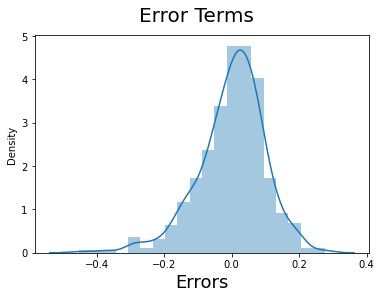

In [56]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

## Making Predictions

Applying the scaling on the test sets

In [59]:
var_num=['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', '2019', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June',
       'March', 'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thurs',
       'Tues', 'Wed', 'Light Snow', 'Mist']

df_test[var_num] = scaler.transform(df_test[var_num])

## Dividing into X_test and y_test

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [63]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

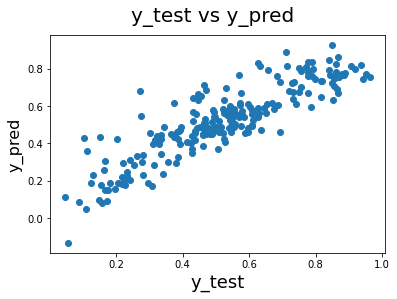

In [64]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


In [65]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.7720731949554798

In [66]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8038032148021996

## We can see that the r square value  for the training data is 80 percent and the test data us 77 percent

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          9.22e-172
Time:                        23:14:37   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0875      0.017      5.029      0.0

## Final Equation is 

## Cnt=-3.06*( holiday)+ 26.58*(temp )-5.3*(windspeed) +7.25 *(summer )+11.1*(winter) +26.09* (2019) +5.22*Sept -9.50*Light snow +0.08